In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [2]:
df = pd.read_csv('../原始数据集/weather.csv')
df.head(2)

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,1280.62,1.02,1.60,224.3,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,1280.33,0.43,0.84,206.8,11.51,428.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             52696 non-null  object 
 1   p (mbar)         52696 non-null  float64
 2   T (degC)         52696 non-null  float64
 3   Tpot (K)         52696 non-null  float64
 4   Tdew (degC)      52696 non-null  float64
 5   rh (%)           52696 non-null  float64
 6   VPmax (mbar)     52696 non-null  float64
 7   VPact (mbar)     52696 non-null  float64
 8   VPdef (mbar)     52696 non-null  float64
 9   sh (g/kg)        52696 non-null  float64
 10  H2OC (mmol/mol)  52696 non-null  float64
 11  rho (g/m**3)     52696 non-null  float64
 12  wv (m/s)         52696 non-null  float64
 13  max. wv (m/s)    52696 non-null  float64
 14  wd (deg)         52696 non-null  float64
 15  Tlog (degC)      52696 non-null  float64
 16  OT               52696 non-null  float64
dtypes: float64(1

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.describe()

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Tlog (degC),OT
count,52696,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,2020-07-02 00:11:52.198269440,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,1210.882855,2.185733,3.632807,176.850276,21.515206,427.681101
min,2020-01-01 00:10:00,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,1107.380000,0.080000,0.000000,0.000000,6.900000,381.100000
25%,2020-04-01 11:47:30,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,1183.900000,1.000000,1.770000,141.100000,15.240000,415.500000
50%,2020-07-02 00:45:00,990.920000,10.230000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,8.990000,1210.800000,1.770000,3.000000,195.500000,20.440000,423.200000
75%,2020-10-01 12:22:30,995.930000,16.180000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,12.200000,1236.550000,2.920000,4.850000,226.700000,26.822500,437.100000
max,2021-01-01 00:00:00,1020.070000,34.800000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,24.530000,1318.520000,13.770000,22.900000,360.000000,49.090000,524.200000
std,NaN,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,36.430222,1.601597,2.462467,81.194840,7.790620,18.700476


均值为：427.681，标准差为：18.700
KstestResult(statistic=0.11118189804899059, pvalue=0.0, statistic_location=426.9, statistic_sign=1)
异常值共496条


(-10.0, 50000.0)

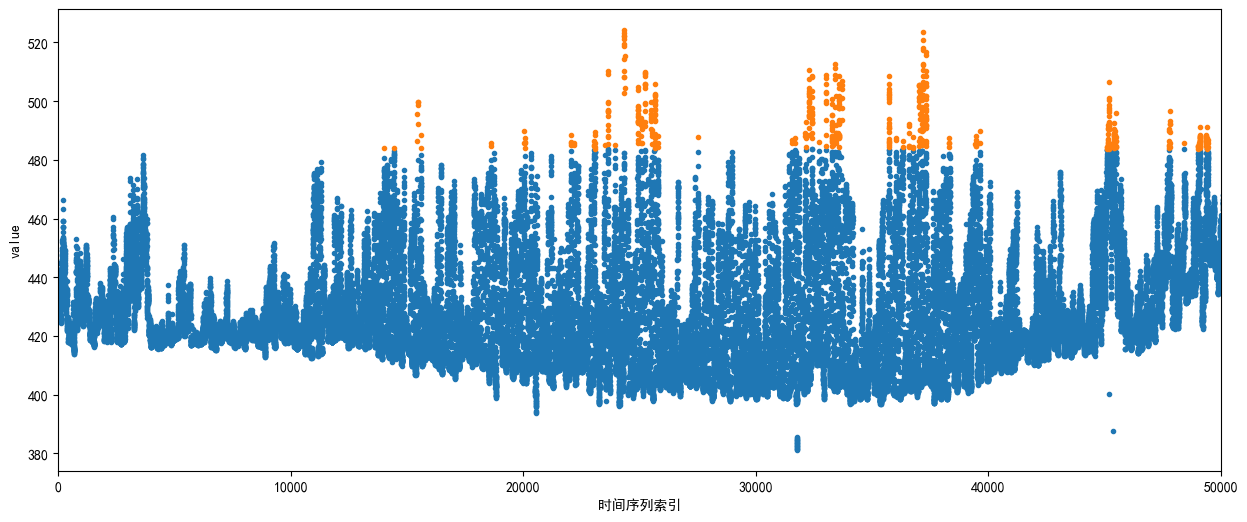

In [6]:
import numpy as np
from scipy import stats


mean = df['OT'].mean()  # 计算均值

std = df['OT'].std()  # 计算标准差

print('均值为：%.3f，标准差为：%.3f' % (mean, std))
print(stats.kstest(df['OT'], 'norm', (mean, std)))


fig, ax = plt.subplots(figsize=(15, 6))

# df['OT'].plot(kind='kde', grid=True, style='-k', title='ETTh1', ax=ax1)

error = df['OT'][np.abs(df['OT'] - mean) > 3 * std]

data_c = df['OT'][np.abs(df['OT'] - mean) <= 3 * std]

print('异常值共%i条' % len(error))

# 筛选出异常值error、剔除异常值之后的数据data_c
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.scatter(data_c.index, data_c, marker='.', alpha=1, label='正常值')

ax.scatter(error.index, error, marker='.', alpha=1, label='异常值')
ax.set_xlabel('时间序列索引')
ax.set_ylabel('value')
ax.set_xlim([-10, 50000])



In [7]:
data = pd.DataFrame(data_c)
error = pd.DataFrame(error)
data.to_csv('output/weather_normal.csv')
error.to_csv('output/weather_error.csv')

In [24]:
import pandas as pd
from pyecharts.charts import Scatter
from pyecharts import options as opts

# 假设你已经有了两个 DataFrame：data 和 error
# 示例：

data = pd.DataFrame(data_c)
error = pd.DataFrame(error)
# 创建散点图对象
scatter = Scatter()

# 添加 data 数据
# 添加 data 数据
scatter.add_xaxis(data.index.tolist())
scatter.add_yaxis(
    "正常值", 
    data['OT'].tolist(), 
    symbol_size=10,
    label_opts=opts.LabelOpts(is_show=False)  # 不显示标签
)

# 添加 error 数据
scatter.add_xaxis(error.index.tolist())
scatter.add_yaxis(
    "异常值", 
    error['OT'].tolist(), 
    symbol_size=10, 
    label_opts=opts.LabelOpts(is_show=False)  # 不显示标签
)

# 设置全局选项
scatter.set_global_opts(
    title_opts=opts.TitleOpts(title="异常值检测"),
    xaxis_opts=opts.AxisOpts(type_="value", name="索引"),
    yaxis_opts=opts.AxisOpts(type_="value", name="value", min_=350, max_=550),  # 设置纵坐标的范围
    tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b}: {c}")
)

# 渲染图表
scatter.render("scatter_plot.html")


'd:\\codefiled\\Graduation_Design\\models\\data\\preop\\scatter_plot.html'

In [7]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# 使用Loess平滑
smoothed_values = lowess(df['OT'], np.arange(len(df['OT'])), frac=0.001)

In [8]:
# 将平滑值添加到数据框中
df['smoothed'] = smoothed_values[:, 1]


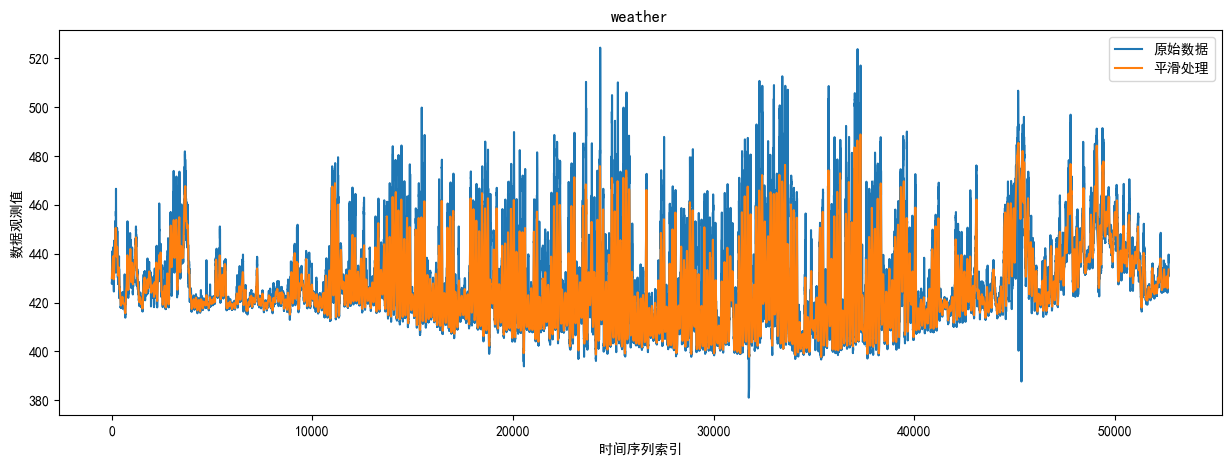

In [9]:
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.figure(figsize=(15,5))
plt.plot(df['OT'], label='原始数据')
plt.plot(df['smoothed'], label='平滑处理')
plt.title('weather')
plt.legend()
plt.xlabel('时间序列索引')
plt.ylabel('数据观测值')
plt.rcParams['axes.unicode_minus'] = False
plt.show()